In [1]:
#linearregreesion
import numpy as np
import pandas as pd
import pandas_profiling 
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [2]:
a=np.array([[1,2,3,4,5,6,7,8]])
b=np.array([-1,2,5,8,11,13,16,19])

In [3]:
lr=LinearRegression()

In [4]:
a.shape

(1, 8)

In [5]:
b.shape

(8,)

In [6]:
a=a.reshape(-1,1)
lr.fit(a,b)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [7]:
lr.score(a,b)

0.9984002559590466

In [8]:
lr.predict([[10]])#

array([24.64285714])

In [9]:
lr.intercept_

-3.5714285714285765

In [10]:
lr.coef_

array([2.82142857])

In [11]:
#training and testing and validation
Train = pd.read_csv('/home/manikanta/Documents/dataset/csvfile/sir_train.csv')
Test = pd.read_csv('/home/manikanta/Documents/dataset/csvfile/sir_test.csv')

In [12]:
Train.head()

,x,y
0,24.0,21.549452
1,50.0,47.464463
2,15.0,17.218656
3,38.0,36.586398
4,87.0,87.288984


In [13]:
Test.head()

,x,y
0,77,79.775152
1,21,23.177279
2,22,25.609262
3,20,17.857388
4,36,41.849864


In [14]:
Train = Train.dropna()
Test  = Test.dropna()

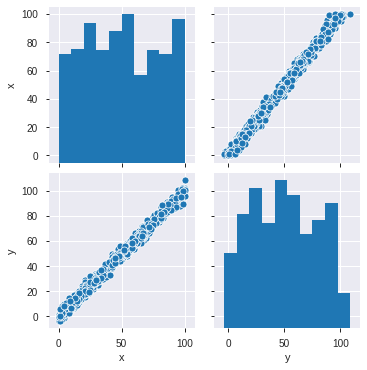

In [15]:
sns.pairplot(Train)

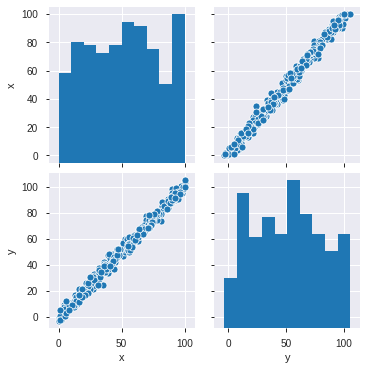

In [16]:
sns.pairplot(Test)

In [17]:
lr=LinearRegression()

In [18]:
Train.columns

Index(['x', 'y'], dtype='object')

In [19]:
Test.columns

Index(['x', 'y'], dtype='object')

In [20]:
x_train=Train[['x']]

In [28]:
y_train=Train['y']

In [29]:
x_test = Test[['x']]
y_test = Test['y']

In [30]:
lr=LinearRegression(normalize=True)

In [31]:
lr.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [32]:
Train_Score =lr.score(x_train,y_train)
Train_Score

0.9907015319025518

In [33]:
Test_Score= lr.score(x_test,y_test)
Test_Score

0.9888014444327563

In [34]:
new_prediction=lr.predict(x_test)
new_prediction

array([76.94327594, 20.90651855, 21.90717494, 19.90586217, 35.91636428,
       14.90258026, 61.93343021, 94.95509081, 19.90586217,  4.89601644,
        3.89536006, 18.90520579, 95.95574719, 61.93343021, 35.91636428,
       14.90258026, 64.93539936, 13.90192388, 86.94983976, 68.93802488,
       88.95115252, 50.92621001, 88.95115252, 26.91045685, 96.95640358,
       57.93080468, 78.9445887 , 20.90651855, 92.95377805, 26.91045685,
       98.95771634, 30.91308237, 32.91439514, 79.94524508, 27.91111323,
       46.92358448, 52.92752277, 68.93802488, 27.91111323, 32.91439514,
       90.95246528, 70.93933765, 49.92555363, 75.94261956,  3.89536006,
       36.91702066, 69.93868127, 67.9373685 , 39.91898981, 34.9157079 ,
       93.95443443, 87.95049614, 51.92686639, 30.91308237, 58.93146107,
       -0.10726546, 38.91833343, 63.93474297, 68.93802488, 56.9301483 ,
       12.9012675 , 71.93999403, 75.94261956, 60.93277383, 81.94655785,
       17.90454941, 40.91964619, 49.92555363, 54.92883554, 12.90

In [35]:
d=pd.DataFrame({'new_pre':new_prediction,'actual_data':y_test})

In [36]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [37]:
mean_squared_error(new_prediction,y_test)

9.432922192039305

In [38]:
mean_absolute_error(new_prediction,y_test)

2.415771850041258

In [39]:
##model score
r2_score(new_prediction,y_test)

0.9883666162358453

In [43]:
from sklearn.model_selection import cross_val_score
cv = cross_val_score(lr,x_train,y_train,cv = 20)

In [44]:
cv

array([0.99028872, 0.98821483, 0.98668645, 0.98961171, 0.99309076,
       0.98695483, 0.98912024, 0.98630777, 0.987217  , 0.99395628,
       0.99398612, 0.99225872, 0.98832487, 0.99062613, 0.99225434,
       0.98894076, 0.99023126, 0.99374311, 0.98760931, 0.99071867])

In [45]:
np.mean(cv)

0.9900070945412065

In [46]:
np.max(cv)

0.9939861249352869

In [48]:
np.min(cv)

0.986307771403265

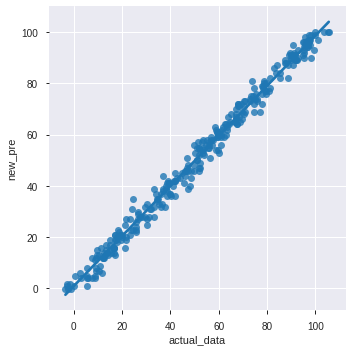

In [ ]:
sns.lmplot(x='actual_data',y='new_pre',data=d)